# Exemplo de classificação de imagens - MNIST

A base de dados do MNIST é uma parte de um outro dataset denominado de NIST. Neste banco, existem diversas imagens de dígitos escritos à mão.

O MNIST é uma base clássica para treinamento de algoritmos de reconhecimento de imagens. Neste exemplo iremos trabalhar com esta base.

Referência: http://yann.lecun.com/exdb/mnist/.

## Carregar pacotes

In [ ]:
library(tidyverse)
library(magrittr)
library(reticulate)
use_python('/usr/local/bin/python3.6')
library(keras)

## Carregar dados

In [2]:
mnist <- dataset_mnist()

## Amostra de treinamento

In [3]:
train_images <- mnist$train$x
train_labels <- mnist$train$y

## Amostra de teste

In [4]:
test_images <- mnist$test$x
test_labels <- mnist$test$y

## Explicando os dados

- Os dados dos labels são vetores com os seguintes tamanhos

In [5]:
print( train_labels %>% dim )
print( test_labels %>% dim )

[1] 60000
[1] 10000


- E apresentam os digitos entre 0 a 9.

In [10]:
train_labels %>% 
    data_frame %>%  
    distinct()

.
5
0
4
1
9
2
3
6
7
8


- Os dados de treinamento e teste estão em formato de tensores.

Tensores possuem 3 propriedades: ordem (eixos), dimensão e tipo.

In [11]:
# eixos (ordem) do tensor
train_images %>% 
  dim %>% 
  length

[1] 3

In [12]:
# formato - 60000 imagens com dimensão 28 x 28
train_images %>% 
  dim

[1] 60000    28    28

In [13]:
# tipo do dados
train_images %>% 
  typeof()

[1] "integer"

## Ver as imagens

0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,67,232,39,0,0,0,0,0
0,0,0,0,62,81,0,0,0,0,⋯,0,0,120,180,39,0,0,0,0,0
0,0,0,0,126,163,0,0,0,0,⋯,0,2,153,210,40,0,0,0,0,0
0,0,0,0,220,163,0,0,0,0,⋯,0,27,254,162,0,0,0,0,0,0
0,0,0,0,222,163,0,0,0,0,⋯,0,183,254,125,0,0,0,0,0,0
0,0,0,46,245,163,0,0,0,0,⋯,0,198,254,56,0,0,0,0,0,0


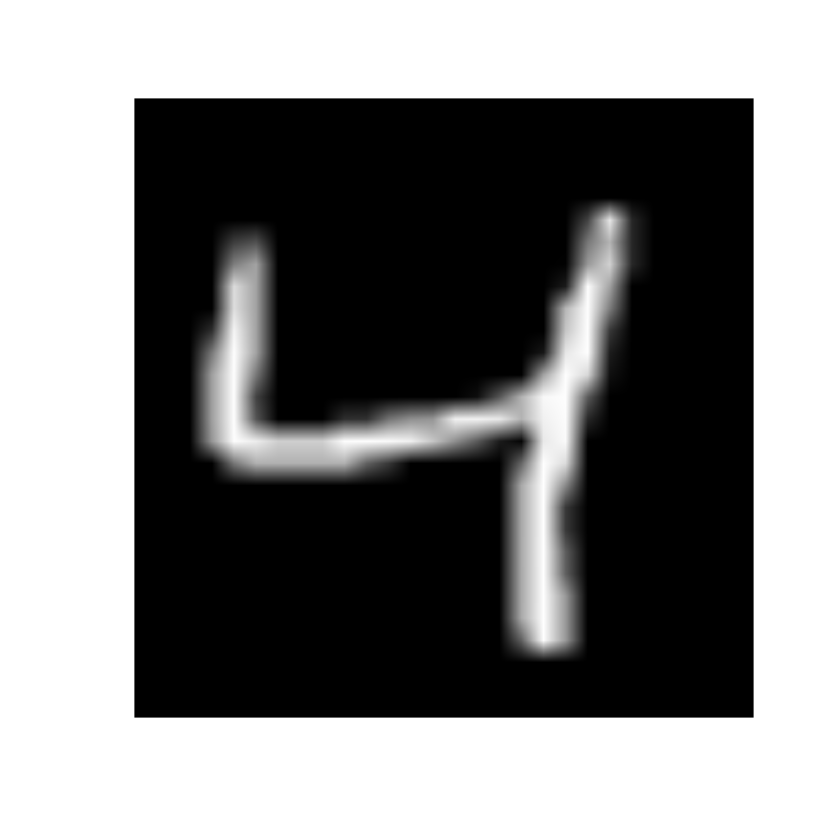

In [14]:
im <- 3
train_images[im,,]
train_images[im,,] %>% 
  as.raster( max = max(train_images[im,,]) ) %>% 
  plot()

## Modelo

O foco da aula é somente apresentar como trabalhamos com imagens e como podemos utilizar algoritmos para realizar o processo de reconhecimento de padrões.

Em nosso exemplo vamos utilizar um modelo de redes neurais utilizando o pacotes Keras com *backend* do Tensorflow.

https://keras.rstudio.com/articles/faq.html

### Criar modelo

In [15]:
network <- keras_model_sequential() %>%
  layer_dense( units = 512, 
               activation = "relu", 
               input_shape = c(28 * 28) ) %>%
  layer_dense( units = 10, 
               activation = "softmax" )

In [16]:
network

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 512)                     401920      
________________________________________________________________________________
dense_2 (Dense)                     (None, 10)                      5130        
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
________________________________________________________________________________



### Métricas para aprendizagem do modelo

- Otimizadores:
http://ruder.io/optimizing-gradient-descent/index.html#rmsprop

In [17]:
network %>% compile(
  optimizer = "rmsprop",
  loss = "categorical_crossentropy",
  metrics = c("accuracy")
)

## Preparação dos dados

- Os dados de treinamento e teste são normalizados para *range* 0-1. A literatura de reconhecimento de imagens mostra que realizar este procedimento melhora o processo de aprendizagem do modelo.

- As dimensões são ajustadas porque o modelo irá "ler" a linha ao invés da matriz quadrada 28 x 28.

In [18]:
train_images <- array_reshape(train_images, c(60000, 28 * 28))
train_images <- train_images / 255
train_images %>% dim

[1] 60000   784

In [19]:
test_images <- array_reshape(test_images, c(10000, 28 * 28))
test_images <- test_images / 255
test_images %>% dim

[1] 10000   784

- Criar uma coluna para cada dígito.

In [20]:
train_labels <- to_categorical(train_labels)
test_labels <- to_categorical(test_labels)

In [25]:
train_labels %>% 
    head()

0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0


## Treinamento do modelo

In [26]:
set.seed(104)
network %>% fit(train_images, 
                train_labels, 
                epochs = 5, 
                batch_size = 128)

## Avaliação

In [27]:
network %>% evaluate(test_images, test_labels)

$loss
[1] 0.06697938

$acc
[1] 0.9784

## Previsão

In [28]:
classes_pred <- network %>% 
  predict_classes(test_images[1:10000,])

- matriz de confusão

In [29]:
data_frame( real = mnist$test$y,
            previsto = classes_pred ) %>% 
  count( real, previsto ) %>% 
  spread( key = real, value = n, fill = 0 )

previsto,0,1,2,3,4,5,6,7,8,9
0,972,0,5,0,1,2,2,2,2,3
1,0,1126,2,0,0,0,3,4,0,2
2,1,4,1006,2,0,0,2,10,4,0
3,0,0,4,996,1,7,1,5,8,2
4,1,0,2,0,953,2,1,1,1,2
5,1,1,0,0,0,870,2,0,5,2
6,2,2,2,1,7,3,945,0,1,0
7,1,0,2,3,1,0,0,977,2,1
8,2,2,9,3,1,5,2,1,942,0
9,0,0,0,5,18,3,0,28,9,997


## Utilizando outras imagens

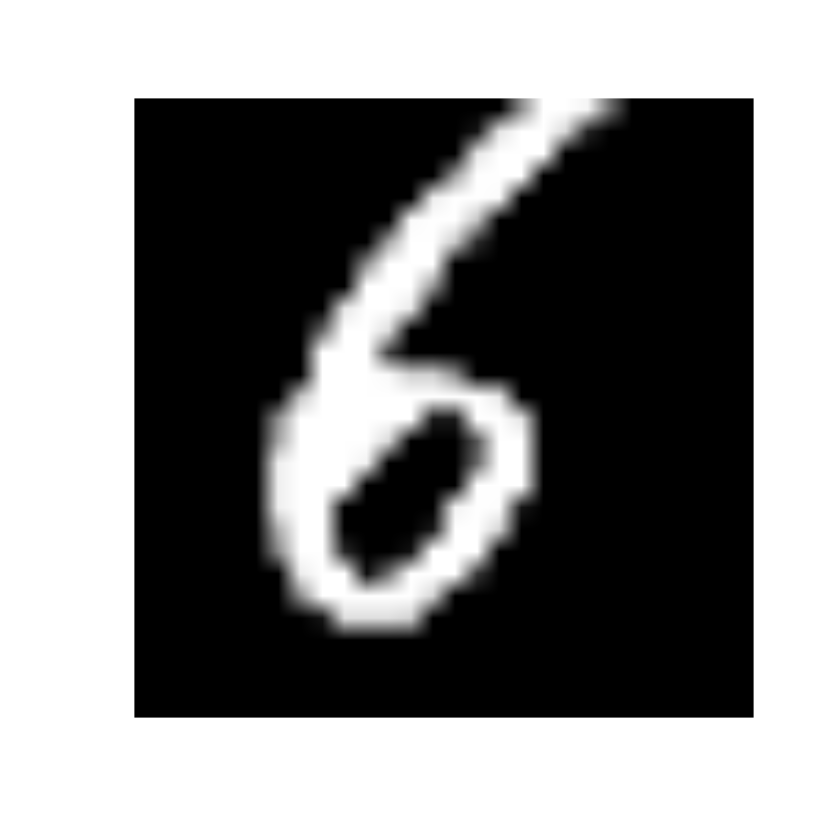

In [34]:
imagem <- image_load(path = "/home/vm-data-science/dados/imagens_mnist/teste_6_2.png",
                     grayscale = FALSE,
                     target_size = c(28, 28) )

imagem <- image_to_array( imagem )

imagem <- imagem[,,1]

imagem %>% 
  as.raster( max = max(imagem) ) %>% 
  plot()

In [35]:
imagem_teste <- array_reshape(imagem, c(1, 28 * 28))

imagem_teste <- imagem_teste / max(imagem_teste)

network %>% 
  predict_classes(imagem_teste)

[1] 6